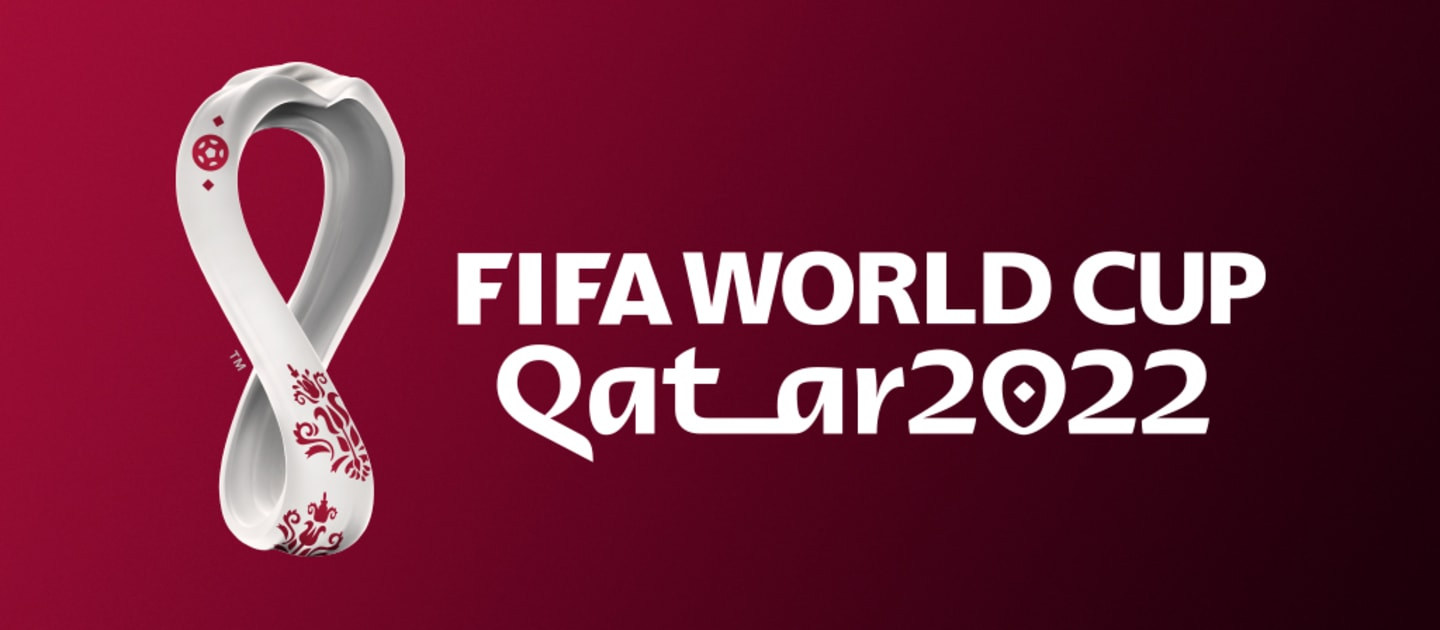

<h1>FIFA World Cup Qatar 2022 Best National Teams according to FIFA 23 videogame</h1>
<h2>Question of the analysis: What are the top 5 national teams that would be on 2022 Qatar World Cup?</h2>
<p> In order to answer this question the FIFA 23 players dataset from the popular videogame will be used. 
    We have to take players from all of the 32 national teams, then taking the best 17 players in the most common positions. After that, establish the top 5 squads according to overall average, then find out each best line up, take the overall average and find out the top 5 ranking of national teams.
   

<h1>Importing needed libraries</h1>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import geopandas

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<h1>1. Data Preparation </h1>

<h2>1.1 Loading data</h2>

In [2]:
players = pd.read_excel(r'C:\Users\Alexis\Documents\Career\Project DataAnalysis\Datasets\Players\FIFA23Players.xlsx')
players.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [3]:
players.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
1,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
2,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22


First of all, we have to select the columns that would be of interest

In [4]:
selected_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'ValueEUR',  
    'BestPosition',
]

players=pd.DataFrame(players, columns=selected_columns)

<h2>1.2 Selecting data from players from 32 World Cup participants</h2>

<p>Request the qualified teams by scrapping Wikipedia '2022 FIFA World Cup qualification' article</p>

In [5]:
#import request and BeautifulSoup libraries
import requests
from bs4 import BeautifulSoup

# get the response in the form of html setting the url
wikiurl="https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_qualification"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [6]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
wctable=soup.find('table',{'class':"wikitable"})

#save the data into a dataframe
wc_teams=pd.read_html(str(wctable))
wc_teams=pd.DataFrame(wc_teams[0])
wc_teams.head()

,Team,Method of qualification,Date of qualification,Total times qualified,Last time qualified,Current consecutive appearances,Previous best performance
0,Qatar,Hosts,2 December 2010,1,–,1,–
1,Germany,UEFA Group J winners,11 October 2021,20[a],2018,18,"Winners (1954, 1974, 1990, 2014)"
2,Denmark,UEFA Group F winners,12 October 2021,6,2018,2,Quarter-finals (1998)
3,Brazil,CONMEBOL winners,11 November 2021,22,2018,22,"Winners (1958, 1962, 1970, 1994, 2002)"
4,France,UEFA Group D winners,13 November 2021,16,2018,7,"Winners (1998, 2018)"


In [7]:
wc_teams_cleaned=[]

#iterate through each team and add it to the wc_teams_cleaned list
for i in wc_teams['Team']:
    wc_teams_cleaned.append(i)
wc_teams_cleaned

['Qatar',
 'Germany',
 'Denmark',
 'Brazil',
 'France',
 'Belgium',
 'Serbia',
 'Spain',
 'Croatia',
 'Switzerland',
 'England',
 'Netherlands',
 'Argentina',
 'Iran',
 'South Korea',
 'Saudi Arabia',
 'Japan',
 'Uruguay',
 'Ecuador',
 'Canada',
 'Ghana',
 'Senegal',
 'Poland',
 'Portugal',
 'Tunisia',
 'Morocco',
 'Cameroon',
 'United States',
 'Mexico',
 'Wales',
 'Australia',
 'Costa Rica']

<p>Select the data from the specific 32 teams</p>

In [8]:
players=players[players['Nationality'].isin(wc_teams_cleaned)]

<h2>1.3 Summarize the data</h2>

In [9]:
players.head()

,Name,Age,Nationality,Overall,Potential,Club,ValueEUR,BestPosition
0,K. Benzema,34,France,91,91,Real Madrid CF,64000000,CF
1,L. Messi,35,Argentina,91,91,Paris Saint-Germain,54000000,CAM
2,K. Mbappé,23,France,91,95,Paris Saint-Germain,190500000,ST
3,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000,CM
4,R. Lewandowski,33,Poland,91,91,FC Barcelona,84000000,ST


In [10]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11501 entries, 0 to 18356
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          11501 non-null  object
 1   Age           11501 non-null  int64 
 2   Nationality   11501 non-null  object
 3   Overall       11501 non-null  int64 
 4   Potential     11501 non-null  int64 
 5   Club          11501 non-null  object
 6   ValueEUR      11501 non-null  int64 
 7   BestPosition  11501 non-null  object
dtypes: int64(4), object(4)
memory usage: 808.7+ KB


<h2>2. Quick Data Visualization</h2>

<h2>2.1 Overall</h2>

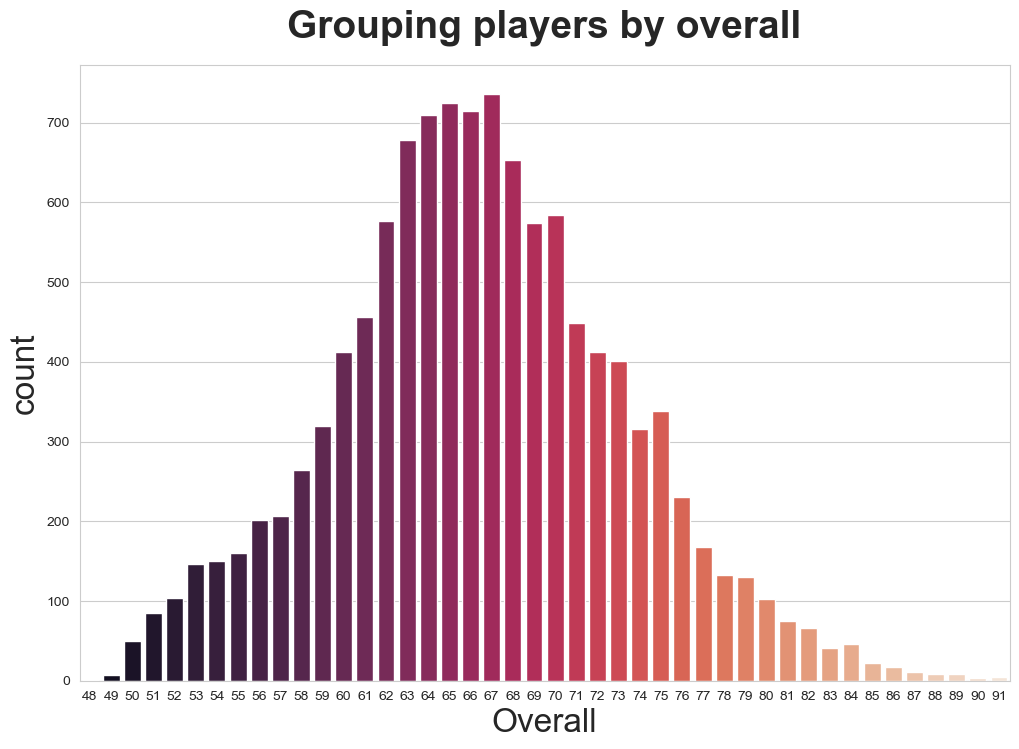

In [11]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
plt.title('Grouping players by overall', fontsize=28, fontweight='bold', y=1.03,)
plt.xlabel('Number of players', fontsize=24)
plt.ylabel('Players Age', fontsize=24)
sns.countplot(x='Overall', data=players, palette="rocket");
plt.show()

<h2>2.2 Nationality</h2>

In [12]:
#Count the number of players per country
players_nationality=pd.DataFrame(players['Nationality'].value_counts())
players_nationality.reset_index(inplace=True)
players_nationality=players_nationality.rename(columns={'index':'Nationality', 'Nationality':'Number of players'})
players_nationality.head()

,Nationality,Number of players
0,England,1652
1,Germany,1209
2,Spain,1054
3,France,936
4,Argentina,930


In [13]:
# Let's take the alpha 3-letter country code per nationality
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# create a column for code 
players_nationality['CODE']=alpha3code(players_nationality.Nationality)

#Substitute missing values on alpha codes. 
#Note: England and Wales are both included in the code GBR from Great Britain
players_nationality.loc[0, 'CODE']='GBR'
players_nationality.loc[12, 'CODE']='KOR'
players_nationality.loc[19, 'CODE']='GBR'
players_nationality.loc[31, 'CODE']='IRN'

players_nationality.head()

,Nationality,Number of players,CODE
0,England,1652,GBR
1,Germany,1209,DEU
2,Spain,1054,ESP
3,France,936,FRA
4,Argentina,930,ARG


In [14]:
# Merged the data with the 'naturalearth_lowres' dataset from GeoPandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Renamed the columns for better using
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

# Merged the world and players_nationality datasets on an outer join
merge=pd.merge(world,players_nationality,on='CODE', how='outer')

# Merged the data from the merge dataset with the latitude and longitude from each country
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Number of players',ascending=False).reset_index()

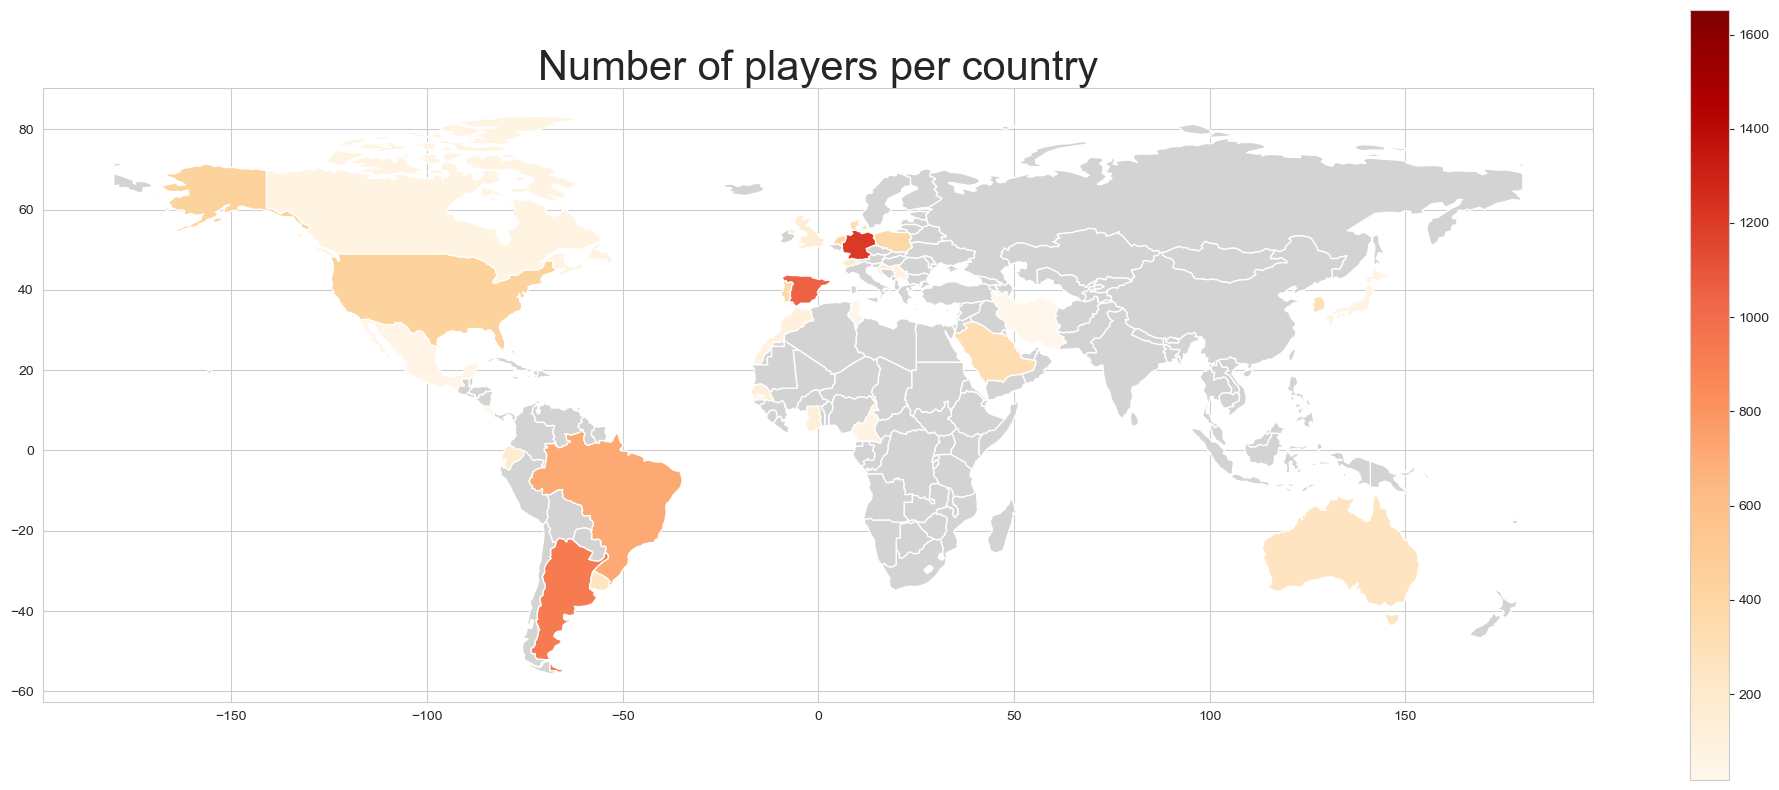

In [15]:
# Plotted the number of players per country world map 
merge.plot(column='Number of players',
           figsize=(25, 10),
           legend=True,cmap='OrRd',
           missing_kwds={"color": "lightgray"})
plt.title('Number of players per country',fontsize=30)
plt.show()

<h2>2.3 Frequency of Positions</h2>

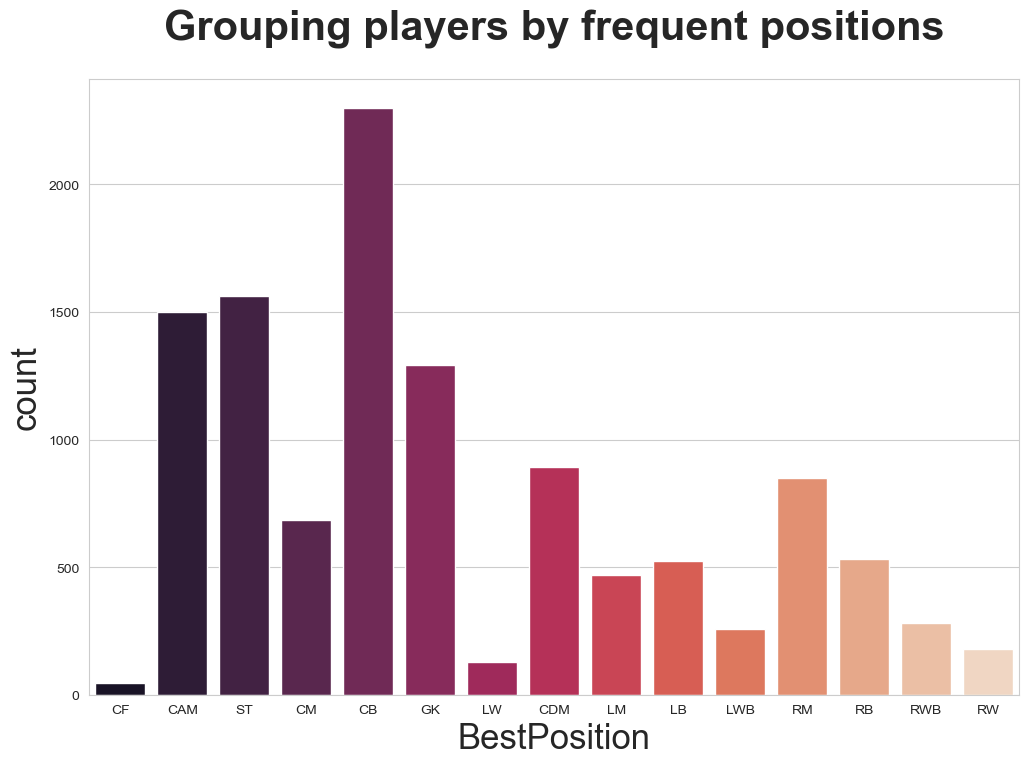

In [16]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
plt.title('Grouping players by frequent positions', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="BestPosition", data=players, palette="rocket");
plt.show()

<h1>3 Squads Analysis</h1>
<h3>3.1 Taking the best 17 players per national team including</h3>
    
<p>1 GK, 1 LB o LWB, 1 RB o RWB, 3 CB, 2 CM o CDM, 2 CAM, 2 RW o RM, 2 LW o LM, 3 ST o CF</p>

In [17]:
all_players={}

#Create a function that gets all players from every Nationality
def allplayers(country):
    all_players[country]=players[players['Nationality'].isin([country])]
    return all_players

#Apply the function for all the wc_teams_cleaned    
for i in wc_teams_cleaned:
    allplayers(i)

In [18]:
#Sort all the overall values for each country
for i in all_players.values():
    i=sorted(i['Overall'])
    

In [19]:
all_squads={}

#Create a function that gets all_squads
def gettop17(country):
    squad=[]
    
    #Counters for each position
    gknum=0
    lbnum=0
    rbnum=0
    cbnum=0
    cmnum=0
    camnum=0
    rwnum=0
    lwnum=0
    stnum=0
    
    
    while len(squad)<17:
        #Goalkeeper
        if (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['GK'])])>0 and gknum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['GK'])])) and (gknum<1):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['GK'])].iloc[gknum])
            gknum+=1
        
        #Left back or Left wing back
        elif (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['LB','LWB'])])>0 and lbnum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['LB','LWB'])])) and (lbnum<1):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['LB','LWB'])].iloc[lbnum])
            lbnum+=1
        
        #Right back or Right wing back
        elif (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['RB','RWB'])])>0 and rbnum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['RB','RWB'])])) and (rbnum<1):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['RB','RWB'])].iloc[rbnum])
            rbnum+=1
        
        #Central back
        elif (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CB'])])>0 and cbnum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CB'])])) and (cbnum<3):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CB'])].iloc[cbnum])
            cbnum+=1
        
        #Central midfielder or Central defensive midfielder
        elif (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CM','CDM'])])>0 and cmnum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CM','CDM'])])) and (cmnum<2):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CM','CDM'])].iloc[cmnum])
            cmnum+=1
        
        #Central attacking midfielder
        elif (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CAM'])])>0 and camnum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CAM'])])) and (camnum<2):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['CAM'])].iloc[camnum])
            camnum+=1
        
        #Right winger or Right midfielder
        elif (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['RW','RM'])])>0 and rwnum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['RW','RM'])])) and (rwnum<2):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['RW','RM'])].iloc[rwnum])
            rwnum+=1
        
        #Left winger or Left midfielder
        elif (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['LW','LM'])])>0 and lwnum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['LW','LM'])])) and (lwnum<2):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['LW','LM'])].iloc[lwnum])
            lwnum+=1
        
        #Striker or Central Forward
        elif (len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['ST','CF'])])>0 and stnum<len(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['ST','CF'])])) and (stnum<3):
            squad.append(pd.DataFrame(all_players[country]).loc[pd.DataFrame(all_players[country])['BestPosition'].isin(['ST','CF'])].iloc[stnum])
            stnum+=1
        else:
            break
        
    all_squads[country]=pd.DataFrame(squad)
    return all_squads[country]

<p>Getting all the squads from 32 countries</p>

In [20]:
for i in wc_teams_cleaned:
    gettop17(i)
    
all_squads['France']

,Name,Age,Nationality,Overall,Potential,Club,ValueEUR,BestPosition
31,H. Lloris,35,France,87,87,Tottenham Hotspur,9000000,GK
71,T. Hernández,24,France,85,90,AC Milan,76000000,LWB
438,J. Clauss,29,France,80,80,Olympique de Marseille,18500000,RWB
94,J. Koundé,23,France,84,89,FC Barcelona,57500000,CB
105,R. Varane,29,France,84,85,Manchester United,39000000,CB
118,L. Hernández,26,France,84,86,FC Bayern München,46000000,CB
19,N. Kanté,31,France,89,89,Chelsea,72000000,CDM
82,P. Pogba,29,France,85,85,Juventus,52500000,CM
62,C. Nkunku,24,France,86,89,RB Leipzig,94000000,CAM
74,N. Fekir,28,France,85,85,Real Betis Balompié,54500000,CAM


### 3.2 The lineups will be: 4-4-2, 4-3-3 and 4-2-3-1

In [21]:
squad_442=['GK',['LB','LWB'],'CB','CB',['RB','RWB'],['CM','CDM','CAM'],['CM','CDM','CAM'],['CAM','LM','LW'],['CAM','RM','RW'],['ST','CF'],['ST','CF']]
squad_433=['GK',['LB', 'LWB'],'CB','CB',['RB','RWB'],['CM','CDM','CAM'],['CM','LM','CAM'],['CM','RM','CAM'],['RW','ST'],['LW','ST'],['ST','CF']]
squad_4231=['GK',['LB', 'LWB'],'CB','CB',['RB','RWB'],['CM','CDM','CAM'],['CM','CDM','CAM'],['RM','RW','ST'],['CAM','ST'],['LM','LW','ST'],['CF','ST']]

In [22]:
#Let's initialize the lineup dictionaries
lineup442={}
lineup433={}
lineup4231={}

#Function to filter per position to get the specific position for a National Team
def filterperposition(position, num, nt):
    if isinstance(position, list):
        pass
    else:
        position=[position]
    return all_squads[nt].loc[all_squads[nt]['BestPosition'].isin(position)].iloc[num]

#### Let's get the 4-4-2 lineup per national team and the general ranking in terms of Average Overall and Potential

In [23]:
#Getting 4-4-2 lineup per national team
for nt in all_squads.keys():
    lineup442[nt]=[]
    for i in squad_442:
        num=0
        if lineup442[nt] and (filterperposition(i, num, nt)[0] in lineup442[nt][-1]['Name']):
            num+=1
            lineup442[nt].append(filterperposition(i, num, nt))
        else:
            lineup442[nt].append(filterperposition(i, num, nt))

In [24]:
#Initialized the lists for the 4-4-2 lineup average overalls and potentials
overalls442=[]
potentials442=[]
lu442=[]

for i in lineup442.keys():
    overalls442.append(round(pd.DataFrame(lineup442[i])['Overall'].mean(), 2))

for i in lineup442.keys():
    potentials442.append(round(pd.DataFrame(lineup442[i])['Potential'].mean(), 2))

for i in lineup442.keys():
    lu442.append('4-4-2')
    
#Created the dataframe with Average Overall and Average Potential for each team
overalls442=pd.DataFrame(overalls442).rename(columns={0:'Avg Overall'})
potentials442=pd.DataFrame(potentials442).rename(columns={0:'Avg Potential'})
lu442=pd.DataFrame(lu442).rename(columns={0:'Lineup'})

ovpo442=pd.concat([lu442, overalls442, potentials442], axis=1)
ovpo442.insert(0, 'Country', wc_teams_cleaned)
ovpo442.sort_values('Avg Overall', ascending=False, inplace=True)

#Top 10 teams with 4-4-2 lineup according to the Average Overall and Potential
ovpo442.head(10)

,Country,Lineup,Avg Overall,Avg Potential
4,France,4-4-2,86.09,87.73
23,Portugal,4-4-2,85.27,86.82
7,Spain,4-4-2,85.18,85.73
1,Germany,4-4-2,85.18,85.91
10,England,4-4-2,84.55,87.82
3,Brazil,4-4-2,84.55,85.73
12,Argentina,4-4-2,83.91,85.00
11,Netherlands,4-4-2,82.64,84.55
5,Belgium,4-4-2,82.36,83.55
8,Croatia,4-4-2,81.18,83.09


#### Let's get the 4-3-3 lineup per national team and the general ranking in terms of Average Overall and Potential

In [25]:
#Getting 4-3-3 lineup per national team
for nt in all_squads.keys():
    lineup433[nt]=[]
    for i in squad_433:
        num=0
        if lineup433[nt] and (filterperposition(i, num, nt)[0] in lineup433[nt][-1]['Name']):
            num+=1
            lineup433[nt].append(filterperposition(i, num, nt))
        else:
            lineup433[nt].append(filterperposition(i, num, nt))

In [26]:
#Initialized the lists for the 4-3-3 lineup average overalls and potentials
overalls433=[]
potentials433=[]
lu433=[]

for i in lineup433.keys():
    overalls433.append(round(pd.DataFrame(lineup433[i])['Overall'].mean(), 2))

for i in lineup433.keys():
    potentials433.append(round(pd.DataFrame(lineup433[i])['Potential'].mean(), 2))

for i in lineup433.keys():
    lu433.append('4-3-3')
    
#Created the dataframe with Average Overall and Average Potential for each team
overalls433=pd.DataFrame(overalls433).rename(columns={0:'Avg Overall'})
potentials433=pd.DataFrame(potentials433).rename(columns={0:'Avg Potential'})
lu433=pd.DataFrame(lu433).rename(columns={0:'Lineup'})

ovpo433=pd.concat([lu433, overalls433, potentials433], axis=1)
ovpo433.insert(0, 'Country', wc_teams_cleaned)
ovpo433.sort_values('Avg Overall', ascending=False, inplace=True)

#Top 10 teams with 4-3-3 lineup according to the Average Overall and Potential
ovpo433.head(10)

,Country,Lineup,Avg Overall,Avg Potential
4,France,4-3-3,85.73,87.36
7,Spain,4-3-3,85.09,85.55
1,Germany,4-3-3,84.91,85.82
23,Portugal,4-3-3,84.82,86.09
3,Brazil,4-3-3,84.73,85.82
5,Belgium,4-3-3,84.27,84.55
10,England,4-3-3,84.18,86.55
11,Netherlands,4-3-3,83.00,85.45
12,Argentina,4-3-3,82.91,83.91
17,Uruguay,4-3-3,81.55,84.00


#### Let's get the 4-2-3-1 lineup per national team and the general ranking in terms of Average Overall and Potential

In [27]:
#Getting 4-2-3-1 lineup per national team
for nt in all_squads.keys():
    lineup4231[nt]=[]
    for i in squad_4231:
        num=0
        if lineup4231[nt] and (filterperposition(i, num, nt)[0] in lineup4231[nt][-1]['Name']):
            num+=1
            lineup4231[nt].append(filterperposition(i, num, nt))
        else:
            lineup4231[nt].append(filterperposition(i, num, nt))

In [28]:
#Initialized the lists for the 4-2-3-1 lineup average overalls and potentials
overalls4231=[]
potentials4231=[]
lu4231=[]

for i in lineup4231.keys():
    overalls4231.append(round(pd.DataFrame(lineup4231[i])['Overall'].mean(), 2))

for i in lineup4231.keys():
    potentials4231.append(round(pd.DataFrame(lineup4231[i])['Potential'].mean(), 2))

for i in lineup4231.keys():
    lu4231.append('4-2-3-1')
    
#Created the dataframe with Average Overall and Average Potential for each team
overalls4231=pd.DataFrame(overalls4231).rename(columns={0:'Avg Overall'})
potentials4231=pd.DataFrame(potentials4231).rename(columns={0:'Avg Potential'})
lu4231=pd.DataFrame(lu4231).rename(columns={0:'Lineup'})

ovpo4231=pd.concat([lu4231, overalls4231, potentials4231], axis=1)
ovpo4231.insert(0, 'Country', wc_teams_cleaned)
ovpo4231.sort_values('Avg Overall', ascending=False, inplace=True)

#Top 10 teams with 4-3-3 lineup according to the Average Overall and Potential
ovpo4231.head(10)

,Country,Lineup,Avg Overall,Avg Potential
4,France,4-2-3-1,85.55,87.27
1,Germany,4-2-3-1,85.36,86.18
3,Brazil,4-2-3-1,85.18,85.64
7,Spain,4-2-3-1,85.09,85.45
23,Portugal,4-2-3-1,85.00,86.18
10,England,4-2-3-1,84.00,86.73
12,Argentina,4-2-3-1,83.55,84.55
11,Netherlands,4-2-3-1,83.18,85.09
5,Belgium,4-2-3-1,82.45,84.00
8,Croatia,4-2-3-1,81.09,82.82


### 3.3 Top 5 national teams with their respective lineup

In [29]:
#Joined the three dataframes to know all the three lineups from each country
all_squads_lineups=pd.concat([ovpo442,ovpo433,ovpo4231], axis=0)

all_squads_lineups

,Country,Lineup,Avg Overall,Avg Potential
4,France,4-4-2,86.09,87.73
23,Portugal,4-4-2,85.27,86.82
7,Spain,4-4-2,85.18,85.73
1,Germany,4-4-2,85.18,85.91
10,England,4-4-2,84.55,87.82
...,...,...,...,...
31,Costa Rica,4-2-3-1,71.00,71.73
24,Tunisia,4-2-3-1,70.91,73.27
13,Iran,4-2-3-1,70.91,71.73
15,Saudi Arabia,4-2-3-1,70.55,71.09


In [30]:
#Initialized the list
best_lineups=[]

#Iterate through all the country names
for i in wc_teams_cleaned:
    best_lineups.append(all_squads_lineups[all_squads_lineups['Country'].isin([i])].sort_values('Avg Overall', ascending=False).iloc[0])

best_lineups=pd.DataFrame(best_lineups)
best_lineups.head(10)

,Country,Lineup,Avg Overall,Avg Potential
0,Qatar,4-3-3,70.36,71.45
1,Germany,4-2-3-1,85.36,86.18
2,Denmark,4-4-2,78.73,81.64
3,Brazil,4-2-3-1,85.18,85.64
4,France,4-4-2,86.09,87.73
5,Belgium,4-3-3,84.27,84.55
6,Serbia,4-3-3,79.36,81.18
7,Spain,4-4-2,85.18,85.73
8,Croatia,4-4-2,81.18,83.09
9,Switzerland,4-3-3,78.09,79.36


### Top 5 national teams

In [31]:
top5=best_lineups.sort_values(['Avg Overall', 'Avg Potential'], ascending=False).head(5)
top5

,Country,Lineup,Avg Overall,Avg Potential
4,France,4-4-2,86.09,87.73
1,Germany,4-2-3-1,85.36,86.18
23,Portugal,4-4-2,85.27,86.82
7,Spain,4-4-2,85.18,85.73
3,Brazil,4-2-3-1,85.18,85.64


#### From this chart we can see that the best national team is France according to its Average Overall

### 3.4 Top 5 National Teams Analysis

### 5) Brazil

<p>The best lineup from Brazil has a structure of <b>4-2-3-1</b>. The best lineup is composed by a base line of 4 defenders, two central midfielders, three central attacking midfielders, and a central forward.</p>

<p>The team has an overall of <b>85.18</b> points over 100, and a potential overall of <b>85.64<b></p>

In [32]:
print('\nSquad lineup:',top5.iloc[4]['Lineup'])
print('Average Potential:',round((top5.iloc[4]['Avg Overall']+top5.iloc[4]['Avg Potential'])/2,2),'/100')
pd.DataFrame(lineup4231['Brazil'])


Squad lineup: 4-2-3-1
Average Potential: 85.41 /100


,Name,Age,Nationality,Overall,Potential,Club,ValueEUR,BestPosition
14,Ederson,28,Brazil,89,91,Manchester City,88000000,GK
371,Welington Dano,22,Brazil,81,81,Clube Atlético Mineiro,27500000,LB
25,Marquinhos,28,Brazil,88,90,Paris Saint-Germain,92000000,CB
48,Thiago Silva,37,Brazil,86,86,Chelsea,12000000,CB
461,Maikel Catarino,26,Brazil,80,80,Sport Club Corinthians Paulista,21000000,RB
12,Casemiro,30,Brazil,89,89,Real Madrid CF,86000000,CDM
38,Fabinho,28,Brazil,87,88,Liverpool,77000000,CDM
193,Ronaldo Cabrais,30,Brazil,83,83,Palmeiras,35000000,RM
207,Coutinho,30,Brazil,82,82,Aston Villa,29500000,CAM
18,Neymar Jr,30,Brazil,89,89,Paris Saint-Germain,99500000,LW


In [33]:
sumvalueBRA=pd.DataFrame(lineup4231['Brazil'])['ValueEUR'].sum()
meanvalueBRA=pd.DataFrame(lineup4231['Brazil'])['ValueEUR'].mean()

print('\033[1m','\nEstimated values', '\033[0m')
print('\nThe total value of the best lineup from Brazil is', '\033[1m',round(sumvalueBRA/1000000, 2),'\033[0m','MM €')
print('\nThe mean value per player from the best lineup from Brazil is', '\033[1m', round(meanvalueBRA/1000000,2),'\033[0m','MM €')

 
Estimated values 

The total value of the best lineup from Brazil is  603.0  MM €

The mean value per player from the best lineup from Brazil is  54.82  MM €


### The squad would form as follows:

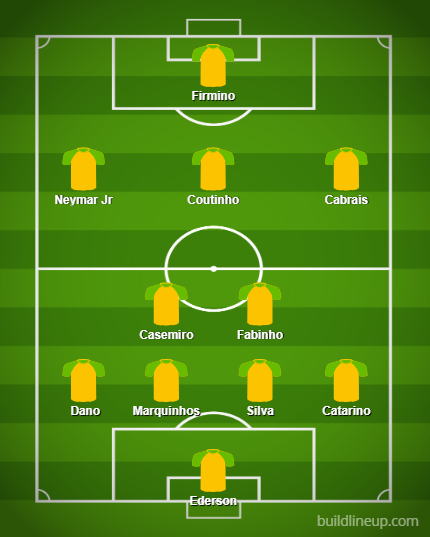

### 4) Spain

<p>The best lineup from Spain has a structure of <b>4-4-2</b>. The best lineup is composed by a base line of 4 defenders, two central midfielders, two central attacking midfielders, and two forwards: a striker and a central forward. </p>

<p>The team has an overall of <b>85.18</b> points over 100, and a potential overall of <b>85.73<b></p>

In [34]:
print('\nSquad lineup:',top5.iloc[3]['Lineup'])
print('Average Potential:',round((top5.iloc[3]['Avg Overall']+top5.iloc[3]['Avg Potential'])/2,2),'/100')
pd.DataFrame(lineup442['Spain'])


Squad lineup: 4-4-2
Average Potential: 85.46 /100


,Name,Age,Nationality,Overall,Potential,Club,ValueEUR,BestPosition
33,De Gea,31,Spain,87,87,Manchester United,42000000,GK
85,Jordi Alba,33,Spain,85,85,FC Barcelona,28000000,LB
55,A. Laporte,28,Spain,86,87,Manchester City,64500000,CB
142,Sergio Ramos,36,Spain,84,84,Paris Saint-Germain,7500000,CB
108,Carvajal,30,Spain,84,84,Real Madrid CF,36500000,RB
42,Rodri,26,Spain,87,89,Manchester City,88500000,CDM
52,Parejo,33,Spain,86,86,Villarreal CF,42000000,CM
121,Marcos Llorente,27,Spain,84,85,Atlético de Madrid,48000000,CAM
124,Oyarzabal,25,Spain,84,86,Real Sociedad,53000000,CAM
79,Gerard Moreno,30,Spain,85,85,Villarreal CF,53000000,ST


In [35]:
sumvalueSPA=pd.DataFrame(lineup442['Spain'])['ValueEUR'].sum()
meanvalueSPA=pd.DataFrame(lineup442['Spain'])['ValueEUR'].mean()

print('\033[1m','\nEstimated values', '\033[0m')
print('\nThe total value of the best lineup from Spain is', '\033[1m',round(sumvalueSPA/1000000, 2),'\033[0m','MM €')
print('\nThe mean value per player from the best lineup from Spain is', '\033[1m', round(meanvalueSPA/1000000,2),'\033[0m','MM €')

 
Estimated values 

The total value of the best lineup from Spain is  489.0  MM €

The mean value per player from the best lineup from Spain is  44.45  MM €


### The squad would form as follows:

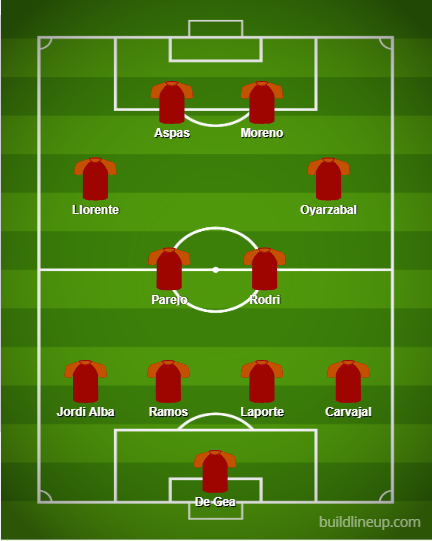

### 3) Portugal

<p>The best lineup from Portugal has a structure of <b>4-4-2</b>. The best lineup is composed by a base line of 4 defenders, two central midfielders, two central attacking midfielders, and two forwards: a striker and a central forward. </p>

<p>The team has an overall of <b>85.27</b> points over 100, and a potential overall of <b>86.82<b></p>

In [36]:
print('\nSquad lineup:',top5.iloc[2]['Lineup'])
print('Average Potential:',round((top5.iloc[2]['Avg Overall']+top5.iloc[2]['Avg Potential'])/2,2),'/100')
pd.DataFrame(lineup442['Portugal'])


Squad lineup: 4-4-2
Average Potential: 86.04 /100


,Name,Age,Nationality,Overall,Potential,Club,ValueEUR,BestPosition
204,Rui Patrício,34,Portugal,82,82,Roma,5000000,GK
26,João Cancelo,28,Portugal,88,88,Manchester City,82500000,LB
20,Rúben Dias,25,Portugal,88,91,Manchester City,107500000,CB
283,Pepe,39,Portugal,81,81,FC Porto,4600000,CB
154,Ricardo Pereira,28,Portugal,83,83,Leicester City,33000000,RB
54,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000,CM
178,Rúben Neves,25,Portugal,83,86,Wolverhampton Wanderers,47500000,CM
27,Bernardo Silva,27,Portugal,88,88,Manchester City,97500000,CAM
96,João Félix,22,Portugal,84,90,Atlético de Madrid,68500000,CAM
9,Cristiano Ronaldo,37,Portugal,90,90,Manchester United,41000000,ST


In [37]:
sumvaluePOR=pd.DataFrame(lineup442['Portugal'])['ValueEUR'].sum()
meanvaluePOR=pd.DataFrame(lineup442['Portugal'])['ValueEUR'].mean()

print('\033[1m','\nEstimated values', '\033[0m')
print('\nThe total value of the best lineup from Portugal is', '\033[1m',round(sumvaluePOR/1000000, 2),'\033[0m','MM €')
print('\nThe mean value per player from the best lineup from Portugal is', '\033[1m', round(meanvaluePOR/1000000,2),'\033[0m','MM €')

 
Estimated values 

The total value of the best lineup from Portugal is  641.6  MM €

The mean value per player from the best lineup from Portugal is  58.33  MM €


### The squad would form as follows:

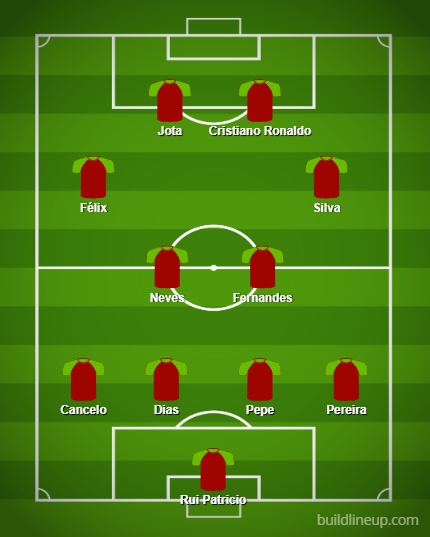

### 2) Germany

<p>The best lineup from France has a structure of <b>4-2-3-1</b>. The best lineup is composed by a base line of 4 defenders, two central midfielders, three central attacking midfielders, and a central forward.</p>

<p>The team has an overall of <b>85.36</b> points over 100, and a potential overall of <b>86.18<b></p>

In [38]:
print('\nSquad lineup:',top5.iloc[1]['Lineup'])
print('Average Potential:',round((top5.iloc[1]['Avg Overall']+top5.iloc[1]['Avg Potential'])/2,2),'/100')
pd.DataFrame(lineup4231['Germany'])


Squad lineup: 4-2-3-1
Average Potential: 85.77 /100


,Name,Age,Nationality,Overall,Potential,Club,ValueEUR,BestPosition
8,M. Neuer,36,Germany,90,90,FC Bayern München,13500000,GK
255,R. Gosens,27,Germany,82,82,Inter,29500000,LWB
30,A. Rüdiger,29,Germany,87,88,Real Madrid CF,73500000,CB
75,N. Süle,26,Germany,85,87,Borussia Dortmund,59000000,CB
409,L. Klostermann,26,Germany,80,82,RB Leipzig,23000000,RB
16,J. Kimmich,27,Germany,89,90,FC Bayern München,105500000,CDM
22,T. Kroos,32,Germany,88,88,Real Madrid CF,72000000,CM
80,S. Gnabry,26,Germany,85,85,FC Bayern München,59000000,RM
32,T. Müller,32,Germany,87,87,FC Bayern München,63000000,CAM
119,L. Sané,26,Germany,84,85,FC Bayern München,49500000,LM


In [39]:
sumvalueGER=pd.DataFrame(lineup4231['Germany'])['ValueEUR'].sum()
meanvalueGER=pd.DataFrame(lineup4231['Germany'])['ValueEUR'].mean()

print('\033[1m','\nEstimated values', '\033[0m')
print('\nThe total value of the best lineup from Germany is', '\033[1m',round(sumvalueGER/1000000, 2),'\033[0m','MM €')
print('\nThe mean value per player from the best lineup from Germany is', '\033[1m', round(meanvalueGER/1000000,2),'\033[0m','MM €')

 
Estimated values 

The total value of the best lineup from Germany is  585.5  MM €

The mean value per player from the best lineup from Germany is  53.23  MM €


### The squad would form as follows:

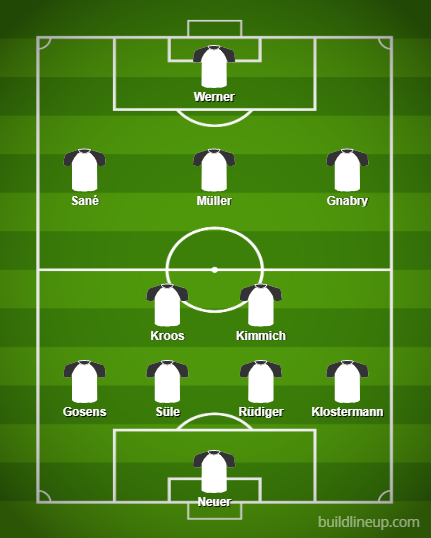

### 1) France

<p>The best lineup from France has a structure of <b>4-4-2</b>. The best lineup is composed by a base line of 4 defenders, two central midfielders, two central attacking midfielders, and two forwards: a striker and a central forward. </p>

<p>The team has an overall of <b>86.09</b> points over 100, and a potential overall of <b>87.73<b></p>

In [40]:
print('\nSquad lineup:',top5.iloc[0]['Lineup'])
print('Average Potential:',round((top5.iloc[0]['Avg Overall']+top5.iloc[0]['Avg Potential'])/2,2),'/100')
pd.DataFrame(lineup442['France'])


Squad lineup: 4-4-2
Average Potential: 86.91 /100


,Name,Age,Nationality,Overall,Potential,Club,ValueEUR,BestPosition
31,H. Lloris,35,France,87,87,Tottenham Hotspur,9000000,GK
71,T. Hernández,24,France,85,90,AC Milan,76000000,LWB
94,J. Koundé,23,France,84,89,FC Barcelona,57500000,CB
105,R. Varane,29,France,84,85,Manchester United,39000000,CB
438,J. Clauss,29,France,80,80,Olympique de Marseille,18500000,RWB
19,N. Kanté,31,France,89,89,Chelsea,72000000,CDM
82,P. Pogba,29,France,85,85,Juventus,52500000,CM
62,C. Nkunku,24,France,86,89,RB Leipzig,94000000,CAM
74,N. Fekir,28,France,85,85,Real Betis Balompié,54500000,CAM
0,K. Benzema,34,France,91,91,Real Madrid CF,64000000,CF


In [41]:
sumvalueFR=pd.DataFrame(lineup442['France'])['ValueEUR'].sum()
meanvalueFR=pd.DataFrame(lineup442['France'])['ValueEUR'].mean()

print('\033[1m','\nEstimated values', '\033[0m')
print('\nThe total value of the best lineup from France is', '\033[1m',round(sumvalueFR/1000000, 2),'\033[0m','MM €')
print('\nThe mean value per player from the best lineup from France is', '\033[1m', round(meanvalueFR/1000000,2),'\033[0m','MM €')

 
Estimated values 

The total value of the best lineup from France is  727.5  MM €

The mean value per player from the best lineup from France is  66.14  MM €


### The squad would form as follows:

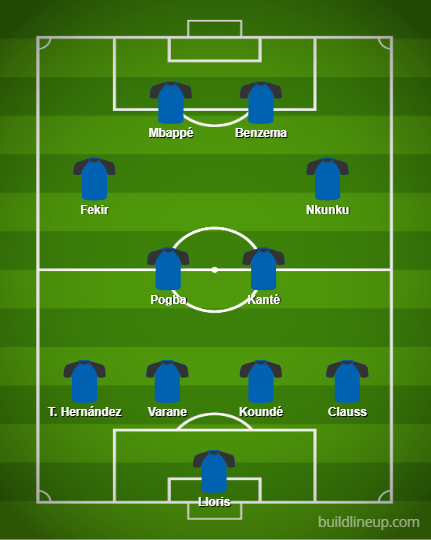

# Conclusions

<p>From the FIFA 23 dataset there are some takeways:</p>

<ul>
    <li>Most of the players have an overall statistic between 60 and 70 out of 100</li>
    <li>The country with more players is England</li>
    <li>The most frequent player position is Central Back (CB)</li>
    <li>The top 5 qualified countries are France, Germany, Portugal, Spain and Brazil</li>
    <li>The best national team is France with a estimated value of 727.5MM € and a mean value per player of 66.14MM €</li>
</ul>